<h1>Cyfrowe przetwarzanie sygnałów i obrazów</h1>
<h2>Przetwarzanie i analiza sygnału EKG</h2>
<b>Autorki:</b> Barbara Parzonka 263955, Joanna Zoglowek 264452
<br><br>
<b>Ćwiczenie 2.</b> 
Celem ćwiczenia jest praktyczne wypróbowanie funkcji numpy.fft
i numpy.ifft do wyznaczania prostej i odwrotnej transformaty Fouriera [1, 3].
<br>1. Wygeneruj ciąg próbek odpowiadający fali sinusoidalnej o częstotliwości 50 Hz
i długości 65536.
<br>2. Wyznacz dyskretną transformatę Fouriera tego sygnału i przedstaw jego widmo
amplitudowe na wykresie w zakresie częstotliwości [0, fs/2], gdzie fs oznacza
częstotliwość próbkowania.
<br>3. Wygeneruj ciąg próbek mieszaniny dwóch fal sinusoidalnych (tzn. ich kombinacji
liniowej) o częstotliwościach 50 i 60 Hz. Wykonaj zadanie z punktu 2 dla tego
sygnału.
<br>4. Powtórz eksperymenty dla różnych czasów trwania sygnałów, tzn. dla różnych
częstotliwości próbkowania.
<br>5. Wyznacz odwrotne transformaty Fouriera ciągów wyznaczonych w zadaniu 2
i porównaj z ciągami oryginalnymi.
<br><br>
<b>Opis realicaji zadania</b> <br>
Realizacji zadania służy interfesj z użytkownikiem umożliwiający wybór badanego sygnału i częstotliwości próbkownia sygnału. 


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%run methods.ipynb

"""
x to wektor probek, 
fs to czestotliwosc probkowania
"""

n=65536
freq5=50
freq6=60
x5=[]
x6=[]
x56=[]
time=[]

def countSignals(sampling):
    global x5, x6, x56, time
    T=1/sampling
    time=[]
    time = np.linspace(0, (n-1)*T, n)
    x5= np.sin(2 * np.pi * freq5 * time)
    x6=np.sin(2 * np.pi * freq6 * time)
    x56=x5+x6


f1=widgets.Checkbox(
    value=False,
    description='Uzyj sinusa o czestotliwosci 50 Hz',
    disabled=False
)
f1.style.description_width = 'auto'

f2=widgets.Checkbox(
    value=False,
    description='Uzyj sinusa o czestotliwosci 60 Hz',
    disabled=False
)
f2.style.description_width = 'auto'


samplingFreq=widgets.IntSlider(
    value=110,
    min=25, 
    max=200, 
    step=1,
    desciption='Czestotliwosc probkowania',
    continuous_update=False,
)
display(f1)
display(f2)
display(samplingFreq)

Checkbox(value=False, description='Uzyj sinusa o czestotliwosci 50 Hz', style=CheckboxStyle(description_width=…

Checkbox(value=False, description='Uzyj sinusa o czestotliwosci 60 Hz', style=CheckboxStyle(description_width=…

IntSlider(value=110, continuous_update=False, max=200, min=25)

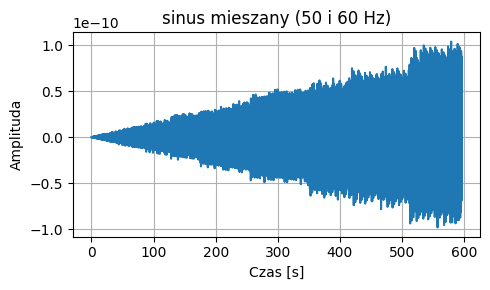

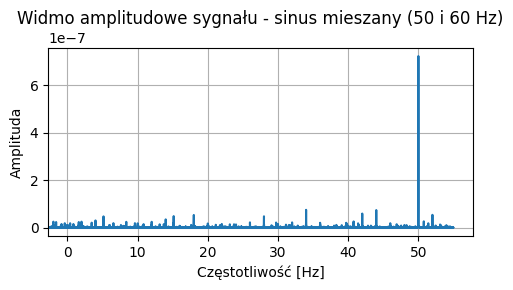

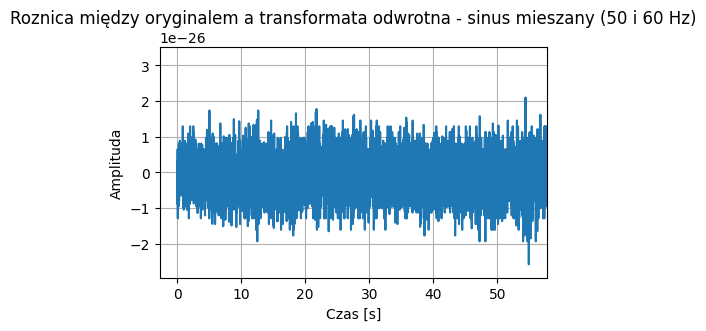

In [18]:
count5=f1.value
count6=f2.value
fs=int(samplingFreq.value)
countSignals(fs)
if count5 and not count6:
    fourierIOdwrotny(x5,time, fs, 'sinus o czestotliwosci 50 Hz')
elif not count5 and count6:
    fourierIOdwrotny(x6,time, fs, 'sinus o czestotliwosci 60 Hz')
elif count5 and count6:
    fourierIOdwrotny(x56,time, fs, 'sinus mieszany (50 i 60 Hz)')
else:
    print('Wybierz sygnal')
